In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from copy import deepcopy

### Feedforward Propagation

* Activation Functions

In [2]:
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def relu(x):
    return np.where(x > 0, x, 0)

def linear(x):
    return x

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

* Loss Functions

In [3]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def categorical_crossentropy(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred)))

In [4]:
def feedForwardPropagation(inputs, outputs, weights):
    # 1. Take the input variable values (inputs), weights (randomly intialized) if this is
    # the first iteration, and the actual outputs in the provided dataset as the parameters of 
    # the feedForwardPropagation function.

    # 2. Calculate hidden layer values by performing the matrix multiplication of the input
    # variable values and the weights of the input layer. Connect the input layer to the hidden
    # layer and add the bias terms associated with the hidden layer's nodes:
    pre_hidden = inputs@(weights[0] + weights[1])

    # 3. Apply the sigmoid activation function to the hidden layer values: 
    hidden = 1/(1 + np.exp(-pre_hidden))

    # 4.Calculate the output layer values by performing the matrix multiplication
    # (np.dot) of hidden layer activation values (hidden) and weights
    # connecting the hidden layer to the output layer (weights[2]) and
    # summing the output with bias associated with the node in the output layer
    # – weights[3]:
    pred_outputs = hidden@(weights[2] + weights[3])

    # 5. Calculate the mean squared error value across the dataset and return the
    # mean squared error:
    mse_error = mse(outputs, pred_outputs)
    return mse_error

### Backforward Propagation

In [5]:
def updateWeights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    temp_weights = deepcopy(weights)
    updated_weights = deepcopy(weights)
    original_loss = feedForwardPropagation(inputs, outputs, original_weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feedForwardPropagation(inputs, outputs, temp_weights)
            grad = (_loss_plus - original_loss) / 0.0001
            updated_weights[i][index] -= lr * grad
    return updated_weights, original_loss

### Putting feedforward propagation and backpropagation together

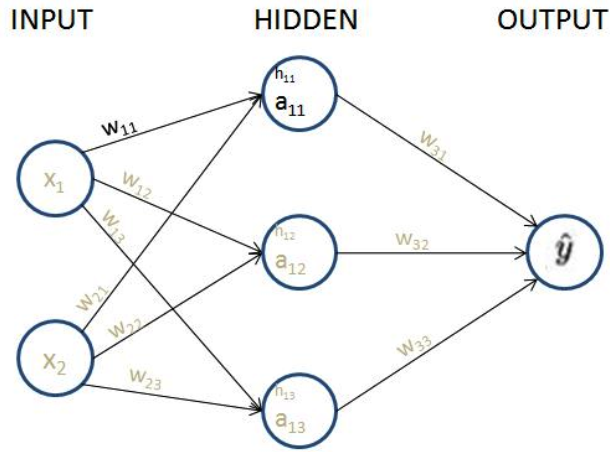

In [6]:
# insert image here
from IPython.display import Image
Image("1.png")


[[0.05740735]]


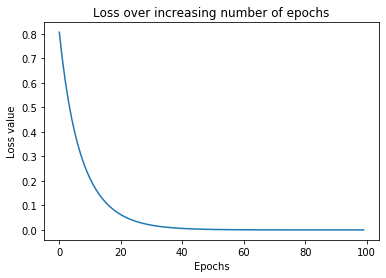

In [7]:
# 1. Import the relevant packages and define the dataset:
x = np.array([[1,1]])
y = np.array([[0]])

# 2. Initialize the weight and bias values randomly.
W = [
            np.array([[-0.0053, 0.3793],
                      [-0.5820, -0.5204],
                      [-0.2723, 0.1896]], dtype=np.float32).T,
            np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32),
            np.array([[ 0.1528,-0.1745,-0.1135]],dtype=np.float32).T,
            np.array([-0.5516], dtype=np.float32)
    ]

# Run the neural network through 100 epochs of 
# feedforward propagation and backpropagation
# Update weights over 100 epochs and fetch the loss 
# value and the updated weight values:
losses = []
for epoch in range(100):
    W, loss = updateWeights(x, y, W, 0.01)
    losses.append(loss)

# 4. Plot the loss values:
plt.plot(losses)
plt.title('Loss over increasing number of epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss value')

# 5. Once we have the updated weights, make the predictions for the input by
# passing the input through the network and calculate the output value:
pre_hidden = np.dot(x,W[0]) + W[1]
hidden = 1/(1+np.exp(-pre_hidden))
pred_out = np.dot(hidden, W[2]) + W[3]
# -0.017
print(pred_out)